# Họ và Tên
# MSSV

### Câu 1 (2 điểm): Cho một ảnh bất kỳ (tên ảnh do sinh viên tự đặt, ví dụ: `my_image.jpg`) và thực hiện các yêu cầu sau:

* Viết chương trình sử dụng Bilateral filter để làm mịn ảnh. (0.5 điểm)  
* Viết chương trình sử dụng Canny Edge Detection để xác định biên của hình ảnh. (0.5 điểm)  
* Đổi màu ảnh bằng cách hoán đổi kênh màu theo thứ tự (ví dụ: BGR → BRG) và lưu thành tên dạng `[ten_anh]_swapped.jpg`. (0.5 điểm)  
* Chuyển ảnh sang không gian màu YCrCb và tách riêng 3 kênh Y, Cr, Cb, lưu thành ảnh grayscale tương ứng (`[ten_anh]_Y.jpg`, `[ten_anh]_Cr.jpg`, `[ten_anh]_Cb.jpg`). (0.5 điểm)


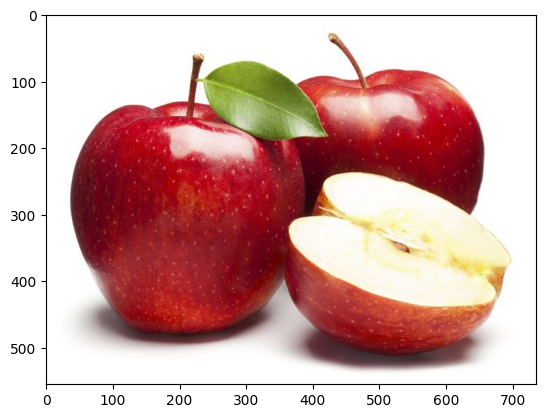

bilateral


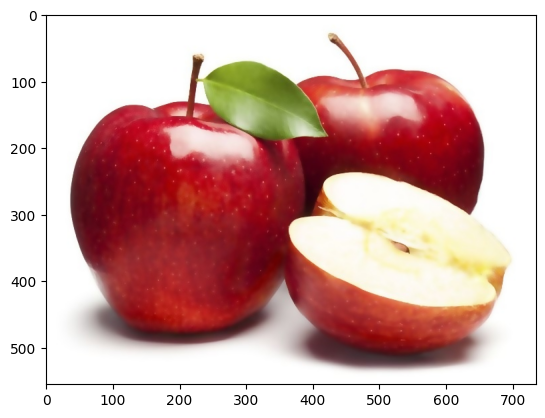

edges


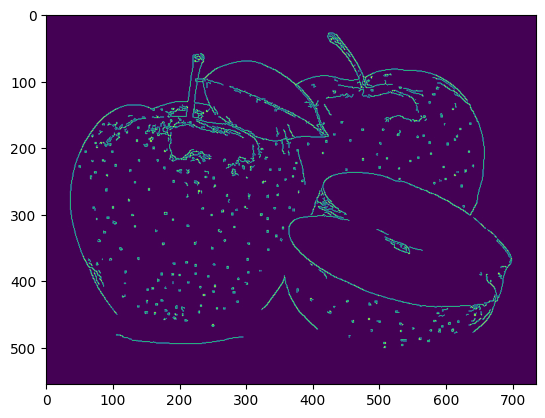

swapped


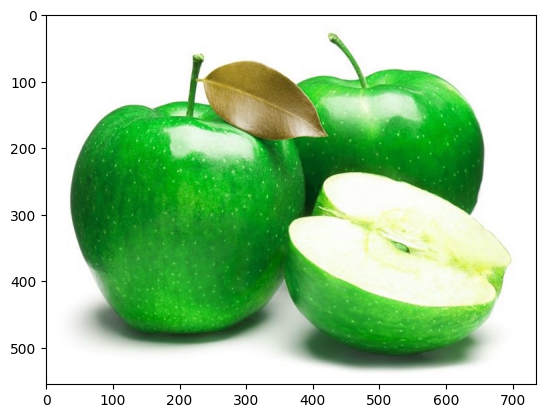

Y, Cr, Cb


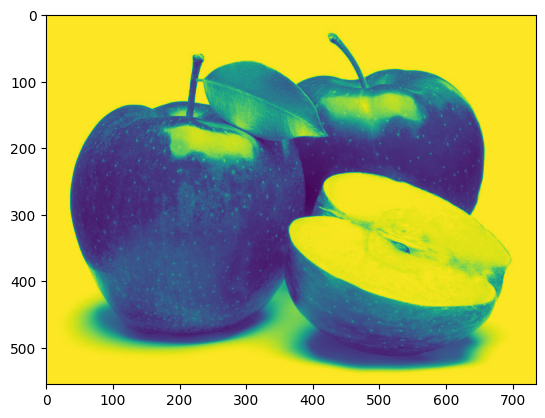

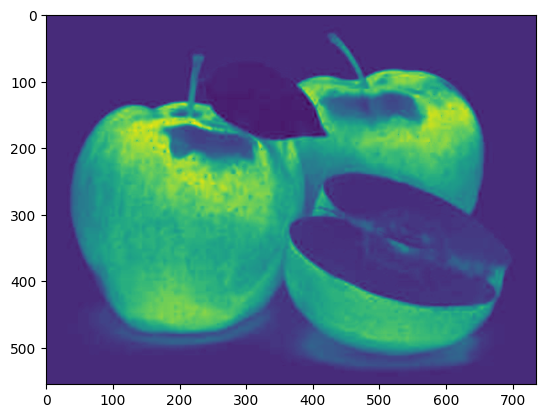

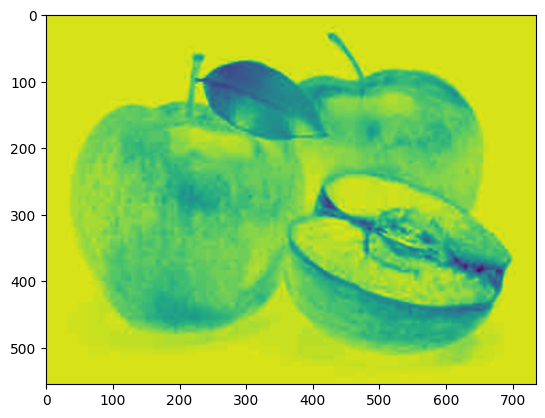

In [2]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread ('tao.jpg')
plt.imshow(data)
plt.show()

import cv2
img_name = 'tao.jpg'
img = cv2.imread(img_name)
bilateral = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)
cv2.imwrite('tao_bilateral.jpg', bilateral)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 200)
cv2.imwrite('tao_edges.jpg', edges)
swapped = img[:, :, [0, 2, 1]]
cv2.imwrite('tao_swapped.jpg', swapped)
ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = cv2.split(ycrcb)
cv2.imwrite('tao_Y.jpg', Y)
cv2.imwrite('tao_Cr.jpg', Cr)
cv2.imwrite('tao_Cb.jpg', Cb)

print('bilateral')
data = iio.imread ('tao_bilateral.jpg')
plt.imshow(data)
plt.show()

print('edges')
data = iio.imread ('tao_edges.jpg')
plt.imshow(data)
plt.show()

print('swapped')
data = iio.imread ('tao_swapped.jpg')
plt.imshow(data)
plt.show()

print('Y, Cr, Cb')
data = iio.imread ('tao_Y.jpg')
plt.imshow(data)
plt.show()
data = iio.imread ('tao_Cr.jpg')
plt.imshow(data)
plt.show()
data = iio.imread ('tao_Cb.jpg')
plt.imshow(data)
plt.show()



### Câu 2 (4 điểm) Viết một chương trình Python sử dụng OpenCV để tạo menu tương tác cho phép người dùng chọn các kỹ thuật biến đổi hình học và xử lý ảnh nâng cao từ một danh sách, áp dụng đồng thời cho nhiều ảnh.

### Yêu cầu:

1. Menu gồm:  
* Phóng to ảnh (Zoom bằng resize) (0.5 điểm)  
* Xoay ảnh (góc ngẫu nhiên từ 0–360 độ) (0.5 điểm)  
* Lật ảnh ngang (0.5 điểm)  
* Lật ảnh dọc (0.5 điểm)  
* Cắt ảnh (crop ngẫu nhiên vùng giữa ảnh) (0.5 điểm)  
* Thêm viền (padding màu ngẫu nhiên) (0.5 điểm)

2. Chương trình xử lý đồng thời 3 ảnh bất kỳ do sinh viên tự chọn (có thể chọn bằng đường dẫn file hoặc nhập tên ảnh tùy ý). (0.5 điểm)

3. Phím tương ứng để kích hoạt các phương pháp xử lý:  
* Z: Zoom  
* T: Rotate  
* H: Horizontal Flip  
* V: Vertical Flip  
* C: Crop  
* P: Padding (0.5 điểm)

4. Lưu file kết quả với định dạng: `result_[phương pháp]_[tên ảnh gốc].jpg`  
   Ví dụ: `result_crop_cat.jpg`, `result_rotate_image1.jpg` (0.5 điểm)


In [ ]:

import cv2
import numpy as np
import random
import os

image_files = [
    'watermelon.jpg',
    'pear.jpg',
    'orange.jpg'
]


images = {name: cv2.imread(name) for name in image_files}

for name, img in images.items():
    if img is None:
        print(f" Không tìm thấy {name}")
        exit()

def zoom_image(img, scale=1.5):
    h, w = img.shape[:2]
    return cv2.resize(img, (int(w*scale), int(h*scale)))

def rotate_image(img):
    angle = random.randint(0, 360)
    h, w = img.shape[:2]
    M = cv2.getRotationMatrix2D((w/2, h/2), angle, 1)
    rotated = cv2.warpAffine(img, M, (w, h))
    return rotated, angle

def flip_horizontal(img):
    return cv2.flip(img, 1)

def flip_vertical(img):
    return cv2.flip(img, 0)

def crop_center(img):
    h, w = img.shape[:2]
    ch, cw = int(h*0.6), int(w*0.6)
    y = (h - ch) // 2
    x = (w - cw) // 2
    return img[y:y+ch, x:x+cw]

def add_padding(img):
    top = bottom = random.randint(10, 50)
    left = right = random.randint(10, 50)
    color = [random.randint(0, 255) for _ in range(3)]
    return cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)

menu = """
Chọn kỹ thuật xử lý ảnh:
Z - Zoom
T - Rotate
H - Horizontal Flip
V - Vertical Flip
C - Crop
P - Padding
Q - Thoát
"""

while True:
    choice = input(menu + "Nhập lựa chọn: ").upper()

    if choice == 'Q':
        print(" thoát chương trình.")
        break

    for name, img in images.items():
        if choice == 'Z':
            result = zoom_image(img)
            filename = f"result_zoom_{os.path.basename(name)}"
        elif choice == 'T':
            result, angle = rotate_image(img)
            filename = f"result_rotate_{os.path.basename(name)}"
            print(f"Ảnh {name} xoay {angle}°")
        elif choice == 'H':
            result = flip_horizontal(img)
            filename = f"result_hflip_{os.path.basename(name)}"
        elif choice == 'V':
            result = flip_vertical(img)
            filename = f"result_vflip_{os.path.basename(name)}"
        elif choice == 'C':
            result = crop_center(img)
            filename = f"result_crop_{os.path.basename(name)}"
        elif choice == 'P':
            result = add_padding(img)
            filename = f"result_padding_{os.path.basename(name)}"
        else:
            print(" Lựa chọn không hợp lệ.")
            continue

        cv2.imwrite(filename, result)
        print(f" Lưu: {filename}")



### Câu 3 (4 điểm) Viết một chương trình Python để xử lý 3 ảnh bất kỳ do sinh viên tự chọn.

* Thêm viền đen 20 pixel cho ảnh đầu tiên. (0.5 điểm)  
* Xoay ảnh thứ hai 45 độ và phóng to 1.5 lần. (0.5 điểm)  
* Tăng kích thước ảnh thứ ba lên 4 lần, sau đó áp dụng Bilateral Filter với tham số tùy chọn. (1.5 điểm)  
* Thay đổi độ sáng và độ tương phản ảnh thứ ba theo công thức:

$$
I_{out}(x, y) = \alpha \cdot I_{in}(x, y) + \beta
$$

Trong đó:  

$$
\alpha \in [0.6, 2.0], \quad \beta \in [-60, 60]
$$

Giá trị đầu ra cần được giới hạn trong khoảng [0, 255] bằng công thức:

$$
I_{out}(x, y) = \text{clip}(I_{out}(x, y), 0, 255)
$$


In [ ]:
import cv2
import numpy as np
img1 = cv2.imread('watermelon.jpg.j')
img2 = cv2.imread('image2.jpg')
img3 = cv2.imread('image3.jpg')
bordered_img1 = cv2.copyMakeBorder(img1, 20, 20, 20, 20, cv2.BORDER_CONSTANT, value=(0, 0, 0))
cv2.imwrite('result_border_image1.jpg', bordered_img1)
h2, w2 = img2.shape[:2]
M2 = cv2.getRotationMatrix2D((w2/2, h2/2), 45, 1.5)
rotated_img2 = cv2.warpAffine(img2, M2, (int(w2*1.5), int(h2*1.5)))
cv2.imwrite('result_rotate_zoom_image2.jpg', rotated_img2)
resized_img3 = cv2.resize(img3, None, fx=4, fy=4, interpolation=cv2.INTER_LINEAR)
bilateral_img3 = cv2.bilateralFilter(resized_img3, d=9, sigmaColor=75, sigmaSpace=75)
cv2.imwrite('result_resize_bilateral_image3.jpg', bilateral_img3)
alpha = 1.5 
beta = 40    
bright_contrast_img3 = cv2.convertScaleAbs(img3, alpha=alpha, beta=beta)
cv2.imwrite('result_brightness_contrast_image3.jpg', bright_contrast_img3)

print("Done")


# Chúc các bạn thi may mắn và đạt điểm 10.